In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df_4o = pandas.read_csv('../data/res/eval_gpt-4o.csv')
df_mini = pandas.read_csv('../data/res/eval_gpt-4o-mini.csv')

In [3]:
# 시각화를 위한 데이터 재구성 (하나의 그래프에 표시)
# metrics = ['Metric_bleu', 'Metric_meteor', 'Metric_ter', 'Metric_rouge_rouge1', 'Metric_rouge_rouge2', 'Metric_rouge_rougeL']
metrics = ['Metric_bleu', 'Metric_meteor', 'Metric_rouge_rouge1', 'Metric_rouge_rouge2', 'Metric_rouge_rougeL']
stats = ['mean', 'std', 'min', '25%']

# 통계량 계산
df_4o_stats = df_4o[metrics].describe().loc[stats]
df_mini_stats = df_mini[metrics].describe().loc[stats]

In [4]:
df_4o_stats

,Metric_bleu,Metric_meteor,Metric_rouge_rouge1,Metric_rouge_rouge2,Metric_rouge_rougeL
mean,0.087115,0.416928,0.458469,0.193564,0.380913
std,0.090401,0.127773,0.134785,0.130410,0.128902
min,0.000000,0.061728,0.000000,0.000000,0.000000
25%,0.000000,0.363369,0.408146,0.119412,0.328123


In [5]:
df_mini_stats

,Metric_bleu,Metric_meteor,Metric_rouge_rouge1,Metric_rouge_rouge2,Metric_rouge_rougeL
mean,0.066837,0.360654,0.412640,0.149622,0.332484
std,0.080723,0.108264,0.132572,0.090178,0.118569
min,0.000000,0.061728,0.000000,0.000000,0.000000
25%,0.000000,0.295458,0.380470,0.088711,0.271232


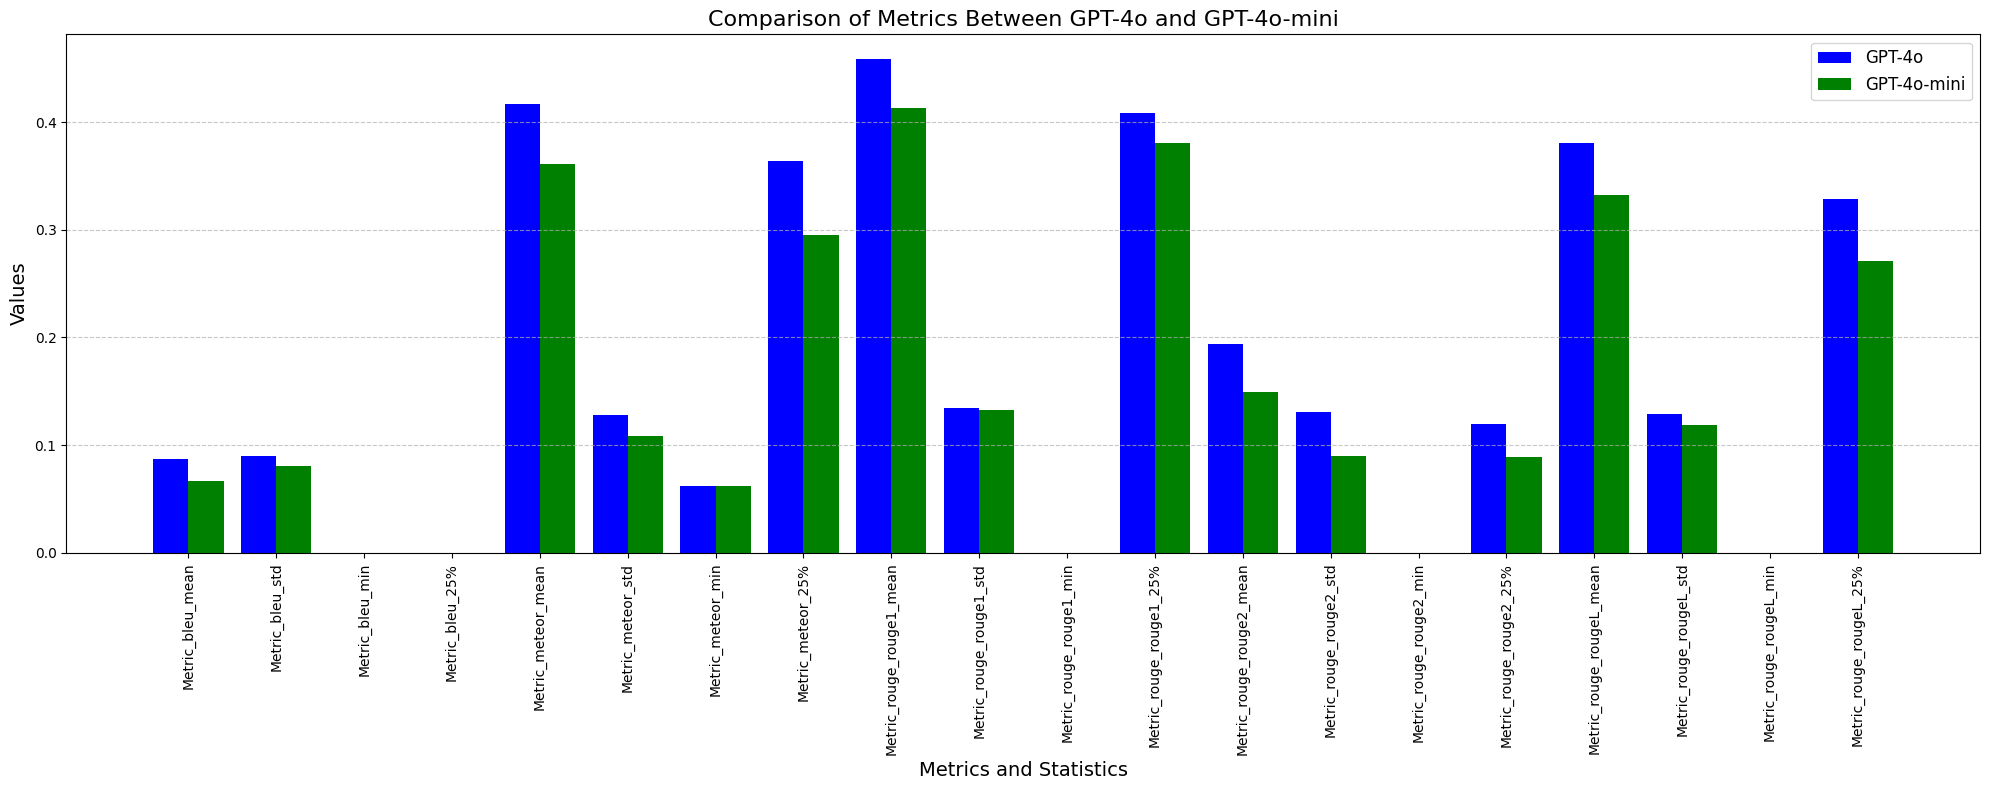

In [6]:
# 하나의 그래프에 표시할 데이터 준비
labels = [f'{metric}_{stat}' for metric in metrics for stat in stats]
values_4o = [df_4o_stats.loc[stat, metric] for metric in metrics for stat in stats]
values_mini = [df_mini_stats.loc[stat, metric] for metric in metrics for stat in stats]

# 시각화
x = np.arange(len(labels))  # X축 위치
width = 0.4  # 막대 폭

plt.figure(figsize=(20, 8))
plt.bar(x - width/2, values_4o, width, label='GPT-4o', color='blue')
plt.bar(x + width/2, values_mini, width, label='GPT-4o-mini', color='green')

# 축 및 그래프 설정
plt.title('Comparison of Metrics Between GPT-4o and GPT-4o-mini', fontsize=16)
plt.ylabel('Values', fontsize=14)
plt.xlabel('Metrics and Statistics', fontsize=14)
plt.xticks(x, labels, rotation=90, fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 그래프 출력
plt.show()

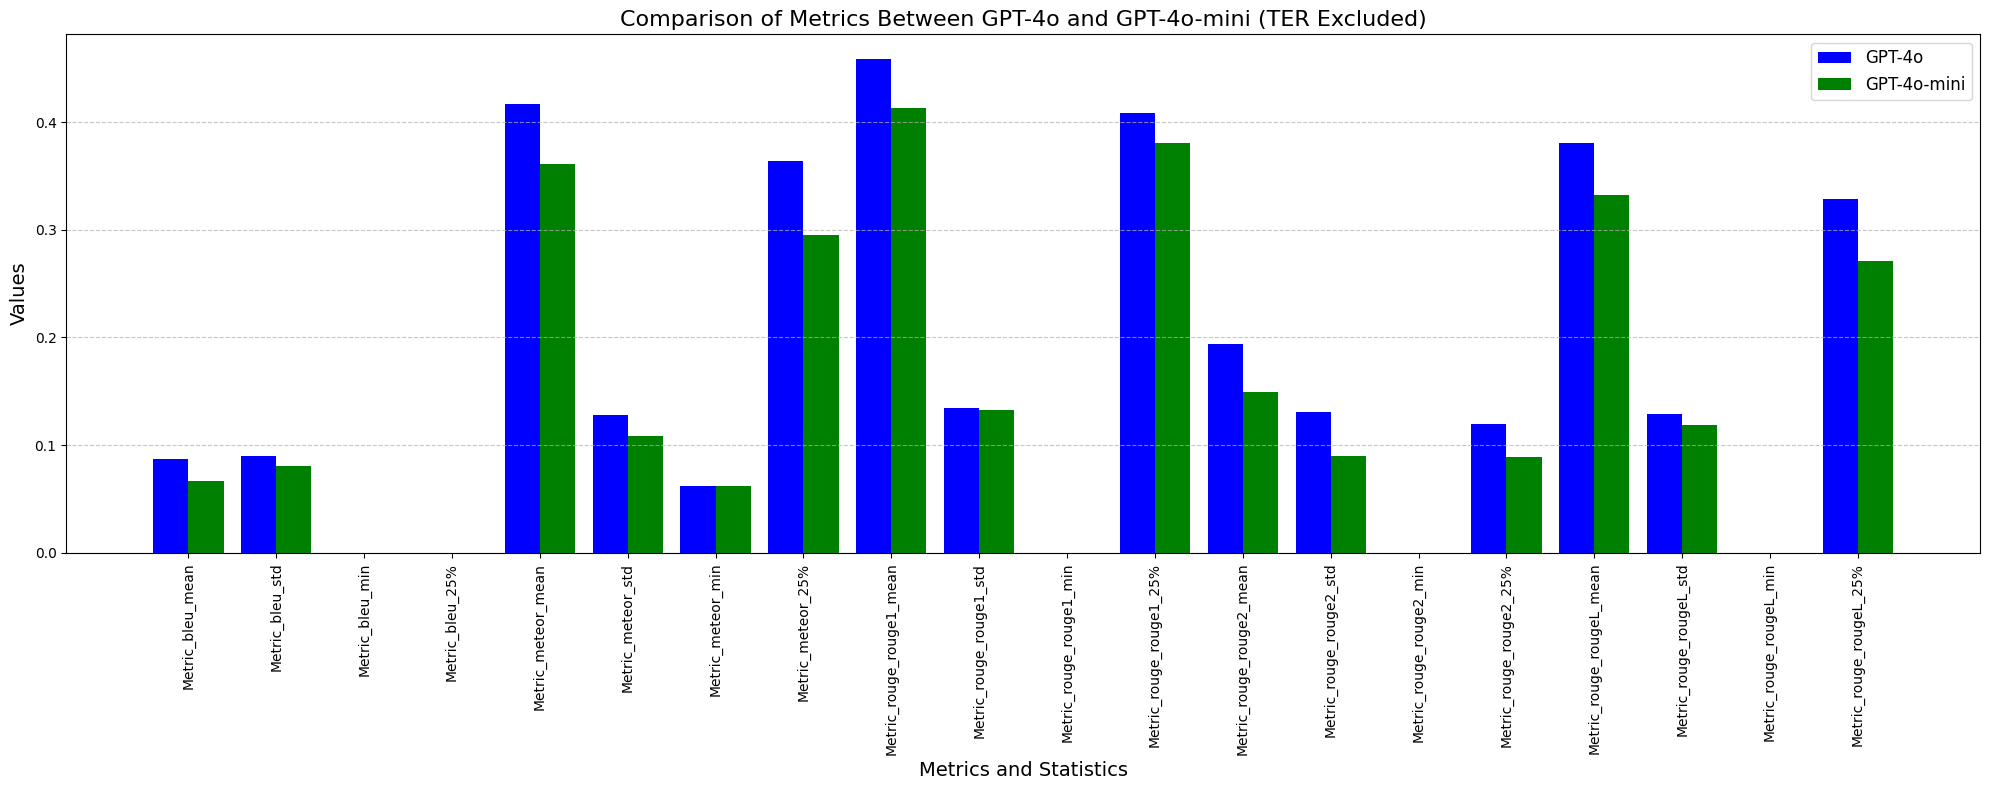

In [7]:
# TER과 관련된 메트릭 제외
metrics_excluding_ter = ['Metric_bleu', 'Metric_meteor', 'Metric_rouge_rouge1', 'Metric_rouge_rouge2', 'Metric_rouge_rougeL']

# 통계량 계산 (TER 제외)
df_4o_stats = df_4o[metrics_excluding_ter].describe().loc[stats]
df_mini_stats = df_mini[metrics_excluding_ter].describe().loc[stats]

# 하나의 그래프에 표시할 데이터 준비
labels = [f'{metric}_{stat}' for metric in metrics_excluding_ter for stat in stats]
values_4o = [df_4o_stats.loc[stat, metric] for metric in metrics_excluding_ter for stat in stats]
values_mini = [df_mini_stats.loc[stat, metric] for metric in metrics_excluding_ter for stat in stats]

# 시각화
x = np.arange(len(labels))  # X축 위치
width = 0.4  # 막대 폭

plt.figure(figsize=(20, 8))
plt.bar(x - width/2, values_4o, width, label='GPT-4o', color='blue')
plt.bar(x + width/2, values_mini, width, label='GPT-4o-mini', color='green')

# 축 및 그래프 설정
plt.title('Comparison of Metrics Between GPT-4o and GPT-4o-mini (TER Excluded)', fontsize=16)
plt.ylabel('Values', fontsize=14)
plt.xlabel('Metrics and Statistics', fontsize=14)
plt.xticks(x, labels, rotation=90, fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 그래프 출력
plt.show()